In [1]:
%pylab inline
from datetime import date
import scipy.stats as stats
from scipy.signal import get_window
import scipy.signal as signal
from scipy.fftpack import fft
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
arr=genfromtxt("AllStations_temperature_h.txt")

In [3]:
n=len(arr[0,0:])
for i in range(n):
    if arr[0,i]==236.6910 and arr[1,i]==48.4623: # to find the UvicSci in allstation data(2d-array)
        m=i
        print m
    else:
        pass
data=arr[2:,m]

33


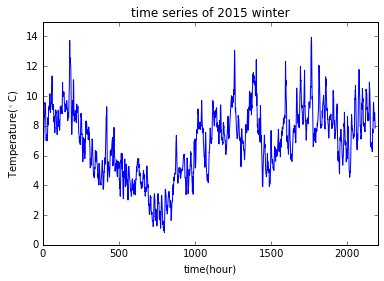

In [4]:
day1=date.toordinal(date(2015,12,1))+366 # python decimal time string shift of 366 days
day2=date.toordinal(date(2016,3,1))+366 
tt_start=arr[2,0]                        # python array starts from 0
dayhr=24                                 # length of a in hour resolution
day1_start=int(2+(day1-tt_start)*dayhr)  # find the position of 2015/12/1,0:00 in arr                                 
day2_start=int(2+(day2-tt_start)*dayhr)  # find the position of 2016/3/1,0:00 in arr

data1=data[day1_start:day2_start]     

x_day=linspace(0,len(data1)-1,len(data1))                 
figure(1)                                    
plot(x_day,data1,'blue')
axis([0,2200,0,15])
xlabel('time(hour)')
ylabel('Temperature($^\circ$C)')
title('time series of 2015 winter')

In [5]:
fsamp=(len(x_day)-1)/(max(x_day)-min(x_day)) 

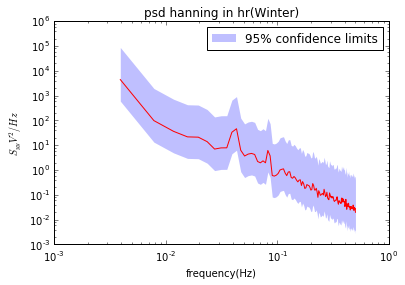

In [6]:
inter = stats.chi2.interval(0.95,df=2)

hfg_hanw,hff_hanw=mlab.psd(data1, NFFT=256, Fs=fsamp, detrend=mlab.detrend_none,
    window=mlab.window_hanning, noverlap=256/2, pad_to=None,
    sides='onesided')
loglog(hff_hanw,hfg_hanw,'r')
fill_between(hff_hanw,hfg_hanw/inter[1],hfg_hanw/inter[0],alpha=0.25,
                linewidth=0.0,edgecolor=None,color=None,facecolor='b',label='95% confidence limits')
legend()
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')
title('psd hanning in hr(Winter)')

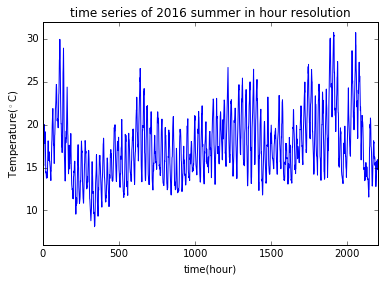

In [7]:
day1=date.toordinal(date(2016,6,1))+366 # python decimal time string shift of 366 days
day2=date.toordinal(date(2016,9,1))+366 
tt_start=arr[2,0]                       # python array starts from 0

dayhr=24                                # length of a in hour resolution
day1_start=int(2+(day1-tt_start)*dayhr) # find the position of 2015/12/1,0:00 in arr                                 
day2_start=int(2+(day2-tt_start)*dayhr) # find the position of 2016/3/1,0:00 in arr
data2=data[day1_start:day2_start]            

x_day=linspace(0,len(data2)-1,len(data2))                 
figure(1)                                    
plot(x_day,data2,'blue')
axis([0,2200,6,32])
xlabel('time(hour)')
ylabel('Temperature($^\circ$C)')
title('time series of 2016 summer in hour resolution')


In [8]:
fsamp=(len(x_day)-1)/(max(x_day)-min(x_day)) 

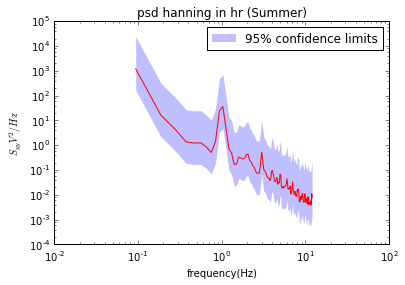

In [9]:
hfg_hans,hff_hans=mlab.psd(data2, NFFT=256, Fs=fsamp*24, detrend=mlab.detrend_none,
    window=mlab.window_hanning, noverlap=256/2, pad_to=None,
    sides='onesided')
loglog(hff_hans,hfg_hans,'r')
fill_between(hff_hans,hfg_hans/inter[1],hfg_hans/inter[0],alpha=0.25,
                linewidth=0.0,edgecolor=None,color=None,facecolor='b',label='95% confidence limits')
legend()
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')
title('psd hanning in hr (Summer)')

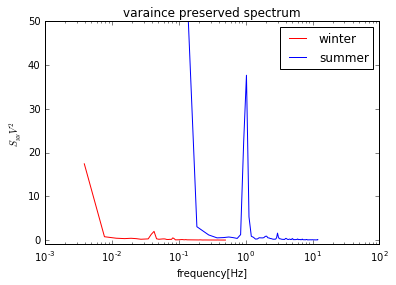

In [10]:

y_1= hff_hanw*hfg_hanw
x_1= hff_hanw
semilogx(x_1, y_1, 'r', label='winter')
xlabel('frequency[Hz]')
ylabel('$S_{yy}V^2$')

y_2= hff_hans*hfg_hans
x_2= hff_hans
semilogx(x_2, y_2, 'b',label='summer')
xlabel('frequency[Hz]')
ylabel('$S_{yy}V^2$')
title('varaince preserved spectrum')
ylim(-1,50)
legend()

The variance is preserved because:
$$d(logf)=\frac{df}{ln(10)f}$$

$$\int_{f_1}^{f_2}S(f) f d(logf)=\frac{1}{ln(10)}\int_{f_1}^{f_2}S(f)df$$

The area under the spectrum is only scaled by $\frac{1}{ln(10)}$, and the shape of the spectrum is preserved.

In [11]:
dfw=hff_hanw[1]-hff_hanw[0]
dfs=hff_hans[1]-hff_hans[0]
Ew=sum(data1**2/len(data1))
print 'the total energy of winter in time domain is:',Ew

Efw=sum(hfg_hanw*dfw)
print 'the total energy of winter in frequency domain is:',Efw


Es=sum(data2**2/len(data2))
print 'the total energy of summer in time domain is:',Es

Efs=sum(hfg_hans*dfs)
print 'the total energy of winter in frequency domain is:',Efs


the total energy of winter in time domain is: 52.5063401099
the total energy of winter in frequency domain is: 51.5058503384
the total energy of summer in time domain is: 320.724166848
the total energy of winter in frequency domain is: 331.74044463


the total energies calculated in frequency domain and time domain are consistent with each other, Parserval’s theorem is tested.

In [12]:
arrm=genfromtxt("UVicSci_temperature.txt")  

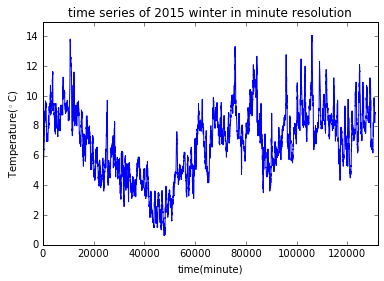

In [13]:
tt_start=arrm[0] -(7.0/24)  # starting time; convert UTC to local time
tt_end=arrm[1] -(7.0/24)    # end time
NT=arrm[2]                  # total number of datapoints in minute resolution

daymin=24*60
day1=date.toordinal(date(2015,12,1))+366      # python decimal time string shift of 366 days
day2=date.toordinal(date(2016,3,1))+366
 
day1_start=int(3+(day1-tt_start)*daymin)   #find the start position in arr
day1_end=int(3+(day2-tt_start)*daymin)
data3=arrm[day1_start:day1_end]
dat3=data3[0:100000]
x_day=linspace(0,len(data3)-1,len(data3))  
plot(x_day,data3,'blue')
axis([0,132000,0,15])
xlabel('time(minute)')
ylabel('Temperature($^\circ$C)')
title('time series of 2015 winter in minute resolution')
fsamp=(len(x_day)-1)/(max(x_day)-min(x_day)) 


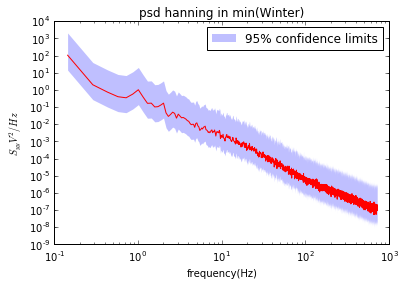

In [14]:
hfg_han1,hff_han1=mlab.psd(dat3,NFFT=len(dat3)/10, Fs=fsamp*24*60, 
    window=mlab.window_hanning, noverlap=len(dat3)/20, 
    sides='onesided')
loglog(hff_han1,hfg_han1,'r')
fill_between(hff_han1,hfg_han1/inter[1],hfg_han1/inter[0],alpha=0.25,
                linewidth=0.0,edgecolor=None,color=None,facecolor='b',label='95% confidence limits')
legend()
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')
title('psd hanning in min(Winter)')

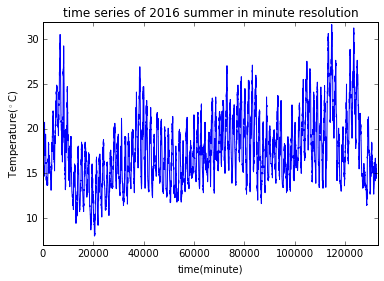

In [15]:
tt_start=arrm[0] -(7.0/24)  # starting time; convert UTC to local time
tt_end=arrm[1] -(7.0/24)    # end time
NT=arrm[2]                  # total number of datapoints in minute resolution

daymin=24*60
day1=date.toordinal(date(2016,6,1))+366      # python decimal time string shift of 366 days
day2=date.toordinal(date(2016,9,1))+366
 
day2_start=int(3+(day1-tt_start)*daymin)   #find the start position in arr
day2_end=int(3+(day2-tt_start)*daymin)
data4=arrm[day2_start:day2_end]
dat4=data4[49000:]
x_day=linspace(0,len(data4)-1,len(data4))  
plot(x_day,data4,'blue')
axis([0,133000,7,32])
xlabel('time(minute)')
ylabel('Temperature($^\circ$C)')
title('time series of 2016 summer in minute resolution')


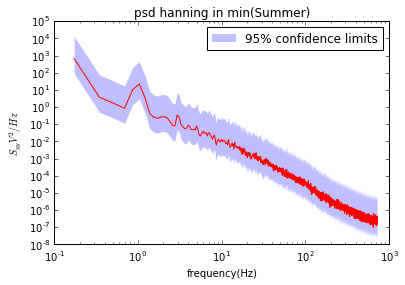

In [16]:
hfg_han2,hff_han2=mlab.psd(dat4, NFFT=len(dat4)/10, Fs=fsamp*24*60, 
    window=mlab.window_hanning, noverlap=len(dat4)/20, 
    sides='onesided')
loglog(hff_han2,hfg_han2,'r')
fill_between(hff_han2,hfg_han2/inter[1],hfg_han2/inter[0],alpha=0.25,
                linewidth=0.0,edgecolor=None,color=None,facecolor='b',label='95% confidence limits')
legend()
xlabel('frequency(Hz)')
ylabel('$S_{yy}V^2/Hz$')
title('psd hanning in min(Summer)')

Minute Resolution gives more information about the high frequency domain.

Q2

$ H(w)=\frac{1}{\sqrt{1+(\frac{wc}{w})^{2n}}} $

$\frac{w}{wc}=0.9$

$ -30dB=\frac{H(0.9wc)}{H(wc)}$

$H(wc)=\frac{1}{\sqrt{1+(\frac{wc}{wc})^{2n}}}=\frac{1}{\sqrt{2}}$

$ -30=20log_{10}\frac{\sqrt{2}}{\sqrt{1+(\frac{1}{0.9})^{2n}}} $

$n=-\frac{1}{2}log_{0.9}(2000-1)$

n=36

$ H(w)=\frac{1}{\sqrt{1+(\frac{wc}{w})^{72}}} $

In [17]:
import math
print -0.5*math.log(1999, 0.9)

36.0685513309


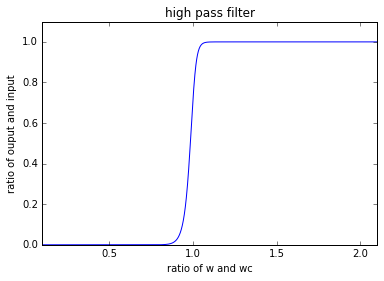

In [18]:
x =linspace(0.1,2.1,2001)
# x = w/wc
H = 1/(1+1/x**72)**0.5
plot(x,H)
xlim(0.1,2.1)
ylim(0,1.1)
xlabel('ratio of w and wc' )
ylabel('ratio of ouput and input')
title('high pass filter')

Attenuation of this high pass filter does not happen at a single point wc, it has a process.
This is an approximation of rectangular filter.

Q3

(-1, 1)

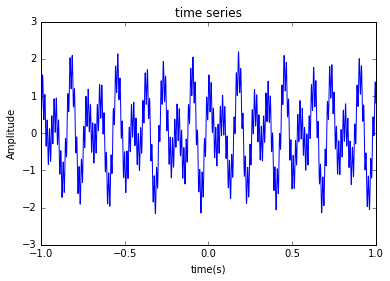

In [19]:
end=15
start=-15
N=30000.0
t= linspace(start,end,N+1)
x1=cos(22*pi*t)
x =x1+0.7*sin(14*pi*t)+0.5*sin(147*pi*t)
plot (t,x)
xlabel('time(s)')
ylabel('Amplitude')
title('time series')
xlim(-1,1)

In [20]:
fsamp=N/(end-start)

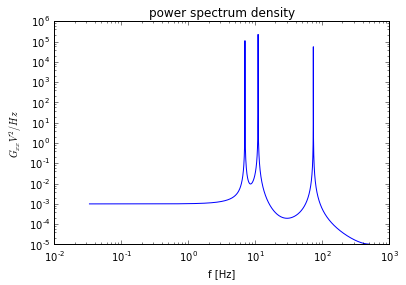

In [21]:
T = 30
dt = T/N
f = np.arange(N/2.0)/T
X = np.fft.fft(x)
G = np.real(dt*np.conj(X[:int(N)/2])*X[:int(N)/2])
loglog(f[:],G[:])
xlabel('f [Hz]')
ylabel('$G_{xx}V^2/Hz$')
title('power spectrum density')

In [22]:
def butterworth(fs,lowcut,highcut,order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

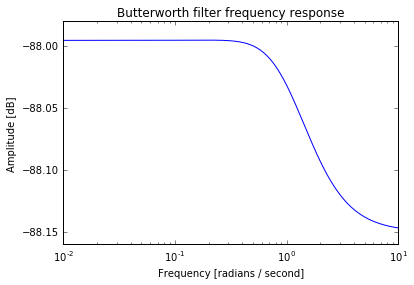

In [24]:
b,a=butterworth(fsamp,10,12,2)
#filtering
filtered=signal.filtfilt(b,a,x)
filtx=np.fft.fft(filtered)
filtG= np.real(dt*np.conj(filtx[:int(N)/2])*filtx[:int(N)/2])
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

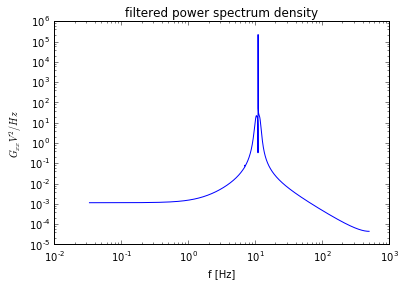

In [25]:
loglog(f,filtG)

xlabel('f [Hz]')
ylabel('$G_{xx}V^2/Hz$')
title('filtered power spectrum density')

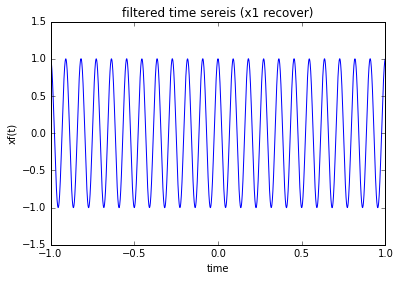

In [26]:
plot(t,filtered)
xlim(-1,1)
xlabel('time')
ylabel('xf(t)')
title('filtered time sereis (x1 recover)')

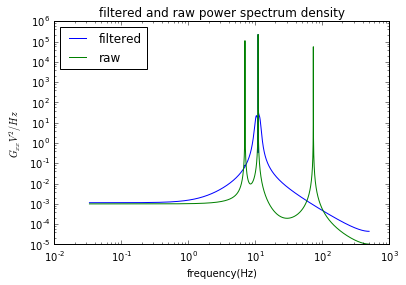

In [27]:
loglog(f,filtG,label='filtered')
loglog(f[:],G[:],label='raw')
xlabel('frequency(Hz)')
ylabel('$G_{xx}V^2/Hz$')
title('filtered and raw power spectrum density')
legend(loc=2)

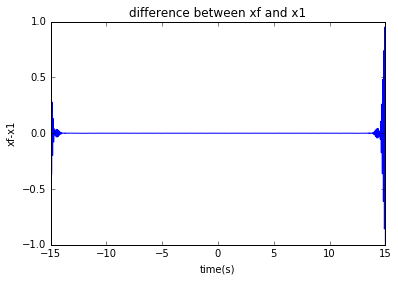

In [28]:
newx=filtered-x1
plot(t,newx)
xlabel('time(s)')
ylabel('xf-x1')
title('difference between xf and x1')